# Appendix

### EXPLANATION: Chart A - Interest Rates Over Time

Chart A establishes the independent variable and provides identification for our regression analysis. The chart shows the Federal Funds Rate (solid blue line) and 10-Year Treasury Rate (solid orange line) from 2020-2025, revealing a dramatic shift from near-zero rates (0-0.5%) during 2020-2022 to approximately 5% by 2023.

**Note on Visual Readability:** The 10-Year Treasury Rate (orange line) may appear more difficult to track visually compared to the Federal Funds Rate because it exhibits greater volatility and more frequent fluctuations throughout the period. The Treasury rate responds to market expectations, inflation concerns, and economic outlook, causing it to oscillate more than the Federal Funds Rate, which follows a smoother, policy-driven trajectory. To improve readability, the orange line uses a thicker line width and reduced marker frequency to better distinguish its path from the more stable Federal Funds Rate.

**Federal Funds Rate as the Primary Explanatory Variable**

As established in the theoretical foundation, BNPL firms rely on short-term borrowing from wholesale markets to fund consumer loans. Their cost of capital is directly tied to short-term interest rates, making Federal Funds Rate—the primary monetary policy tool—the most relevant rate for their business model.

Unlike long-term rates (10-Year Treasury) which affect mortgages and bonds, Fed Funds Rate directly impacts BNPL's funding costs because they borrow short-term (commercial paper, credit lines, securitization). When Fed Funds Rate rises from 0% to 5%, BNPL's borrowing costs increase immediately, squeezing their thin margins.

**The Importance of Interest Rate Variation**

This substantial variation in interest rates—a 500 basis point increase—creates a natural experiment that allows us to test whether BNPL stock returns respond to rate changes. Theoretically, BNPL firms should be highly sensitive to interest rates because they operate on thin margins (~1-3% net margins) and rely on access to cheap capital for funding consumer loans. When rates rise, their funding costs increase disproportionately, directly impacting profitability.

The shaded region highlights the rapid rate increase period (2022-2023), which provides the key variation needed for our regression analysis. Without this variation, we could not identify the causal relationship between rates and BNPL returns.

**How This Sets Up the Analysis**

Chart A serves two critical functions: (1) it demonstrates sufficient variation in our key explanatory variable to enable statistical identification, and (2) it provides economic context for why BNPL firms might be particularly sensitive to monetary policy changes.

This sets the stage for Chart B, which directly tests the relationship between rate changes and BNPL returns using regression analysis.

---

Fetching interest rate data from FRED...
  Fetching Federal Funds Rate (attempt 1/3)...
    ✓ Federal Funds Rate data retrieved
  Fetching 10-Year Treasury Rate (attempt 1/3)...
    ✓ 10-Year Treasury Rate data retrieved


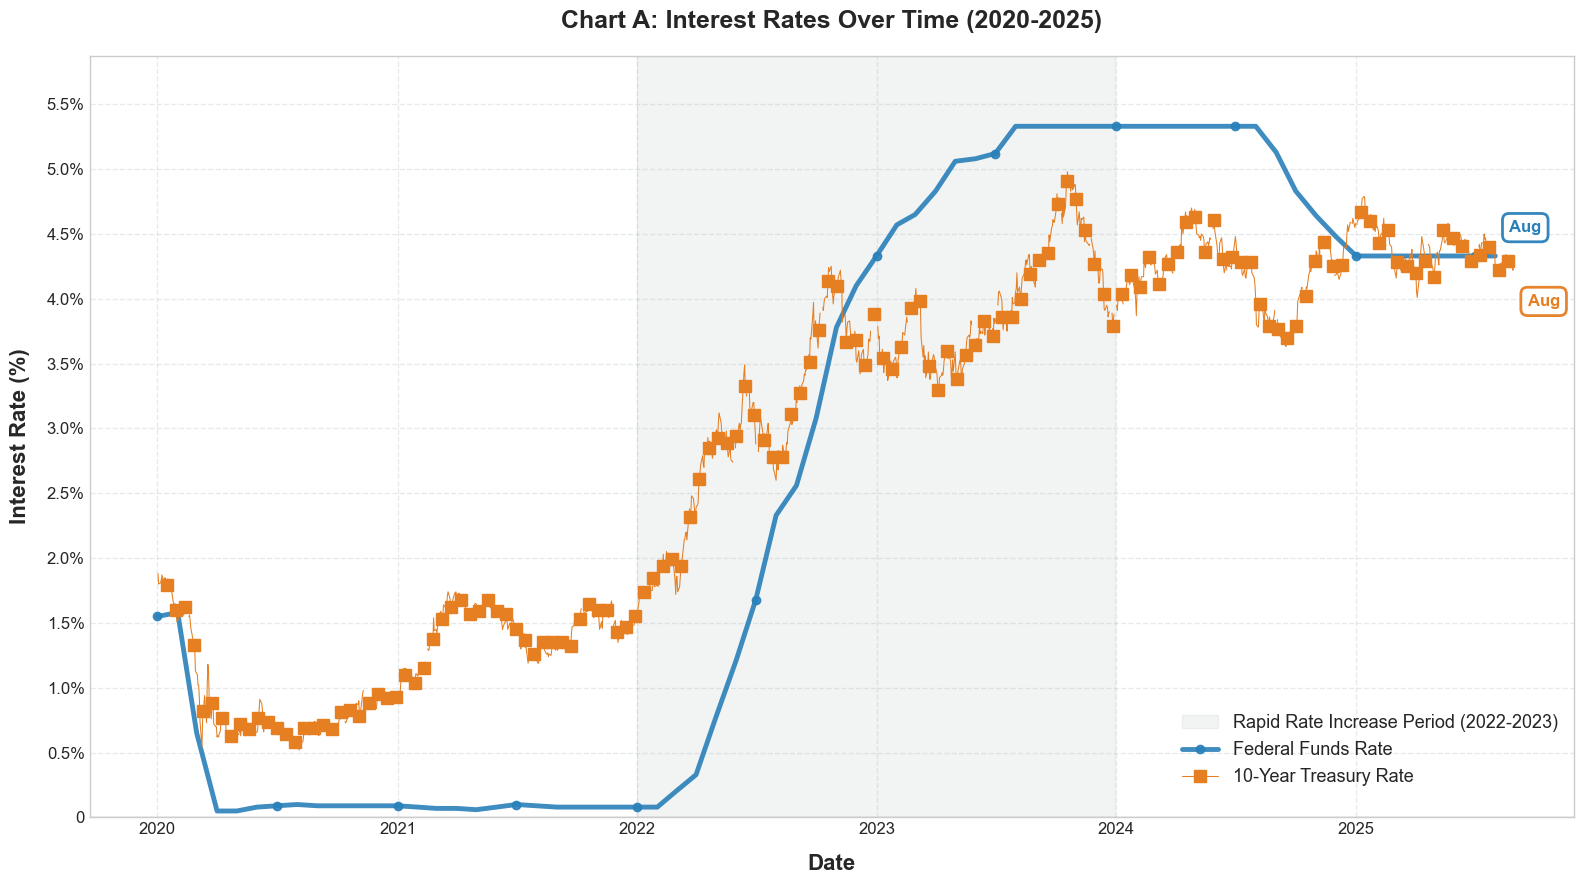

✓ Chart A created successfully
  Federal Funds Rate range: 0.05% - 5.33%
  10-Year Treasury Rate range: 0.52% - 4.98%


In [319]:
# ============================================================================
# CHART A: Interest Rates Over Time
# ============================================================================

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np

# Set style with better readability
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# Configure matplotlib for better readability
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize': 17,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 13,
    'figure.titlesize': 18
})

# Fetch interest rate data from FRED
print("Fetching interest rate data from FRED...")
start_date = datetime(2020, 1, 1)
end_date = datetime(2025, 8, 31)

try:
    # Add retry logic for FRED API calls
    import time
    max_retries = 3
    retry_delay = 5  # seconds
    
    fed_funds = None
    treasury_10y = None
    
    for attempt in range(max_retries):
        try:
            if fed_funds is None:
                print(f"  Fetching Federal Funds Rate (attempt {attempt + 1}/{max_retries})...")
                fed_funds = web.DataReader('FEDFUNDS', 'fred', start_date, end_date)
                print("    ✓ Federal Funds Rate data retrieved")
            
            if treasury_10y is None:
                print(f"  Fetching 10-Year Treasury Rate (attempt {attempt + 1}/{max_retries})...")
                treasury_10y = web.DataReader('DGS10', 'fred', start_date, end_date)
                print("    ✓ 10-Year Treasury Rate data retrieved")
            
            break  # Success, exit retry loop
            
        except Exception as e:
            if attempt < max_retries - 1:
                print(f"    ⚠ Attempt {attempt + 1} failed: {str(e)[:60]}")
                print(f"    Retrying in {retry_delay} seconds...")
                time.sleep(retry_delay)
            else:
                raise  # Re-raise on final attempt
    
    # Create figure with consistent size
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # Highlight rapid rate increase period FIRST (so it's behind the lines)
    rate_increase_start = datetime(2022, 1, 1)
    rate_increase_end = datetime(2023, 12, 31)
    ax.axvspan(rate_increase_start, rate_increase_end, 
               alpha=0.12, color='#95a5a6', label='Rapid Rate Increase Period (2022-2023)', zorder=1)
    
    # Plot Federal Funds Rate (solid line) - blue color
    ax.plot(fed_funds.index, fed_funds['FEDFUNDS'], 
            linewidth=3.5, color='#2980b9', label='Federal Funds Rate', 
            marker='o', markersize=6, markevery=6, zorder=4, alpha=0.9)
    
    # Add date label at end of Federal Funds Rate line - positioned within grid
    last_fed_date = fed_funds.index[-1]
    last_fed_value = fed_funds['FEDFUNDS'].iloc[-1]
    last_fed_label = last_fed_date.strftime('%b')
    ax.annotate(last_fed_label, 
                xy=(last_fed_date, last_fed_value),
                xytext=(10, 15), textcoords='offset points',
                fontsize=12, fontweight='bold', color='#2980b9',
                va='bottom', ha='left', clip_on=True,
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                         edgecolor='#2980b9', linewidth=2, alpha=0.95))
    
    # Plot 10-Year Treasury Rate (solid line) - orange color with improved readability
    ax.plot(treasury_10y.index, treasury_10y['DGS10'], 
            linewidth=0.75, color='#e67e22', label='10-Year Treasury Rate', 
            marker='s', markersize=9, markevery=10, zorder=4, alpha=1.0)
    
    # Add date label at end of Treasury Rate line - positioned within grid
    last_treasury_date = treasury_10y.index[-1]
    last_treasury_value = treasury_10y['DGS10'].iloc[-1]
    last_treasury_label = last_treasury_date.strftime('%b')
    ax.annotate(last_treasury_label, 
                xy=(last_treasury_date, last_treasury_value),
                xytext=(10, -18), textcoords='offset points',
                fontsize=12, fontweight='bold', color='#e67e22',
                va='top', ha='left', clip_on=True,
                bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                         edgecolor='#e67e22', linewidth=2, alpha=0.95))
    
    # Extend x-axis limits to accommodate labels within grid
    xlim_current = ax.get_xlim()
    ylim_current = ax.get_ylim()
    # Convert to datetime if needed and extend by ~3 months
    if isinstance(fed_funds.index[-1], pd.Timestamp):
        max_date = max(fed_funds.index[-1], treasury_10y.index[-1])
        extended_date = max_date + pd.DateOffset(months=3)
        ax.set_xlim(left=xlim_current[0], right=mdates.date2num(extended_date))
    else:
        ax.set_xlim(left=xlim_current[0], right=xlim_current[1] * 1.03)
    
    # Extend y-axis slightly to ensure labels fit
    ax.set_ylim(bottom=0, top=ylim_current[1] * 1.05)
    
    # Add zero line reference
    ax.axhline(y=0, color='#7f8c8d', linestyle='-', linewidth=1, alpha=0.5, zorder=2)
    
    # Consistent formatting
    ax.set_xlabel('Date', fontsize=16, fontweight='bold', labelpad=12)
    ax.set_ylabel('Interest Rate (%)', fontsize=16, fontweight='bold', labelpad=12)
    ax.set_title('Chart A: Interest Rates Over Time (2020-2025)', 
                 fontsize=18, fontweight='bold', pad=20)
    
    # Legend positioning - adjusted to right=0.91
    legend = ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.02), fontsize=13, 
                       framealpha=0.95, edgecolor='#34495e', fancybox=True, shadow=True)
    legend.get_frame().set_facecolor('white')
    plt.subplots_adjust(bottom=0.12, right=0.91)
    
    # Consistent grid styling
    ax.grid(True, alpha=0.35, linestyle='--', linewidth=1, color='#bdc3c7', zorder=0)
    ax.set_axisbelow(True)
    
    # Consistent date formatting
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator((1, 7)))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='center')
    
    # Consistent y-axis formatting - show 0.0% as "0" and use 0.5% intervals
    def format_y_axis(x, p):
        if abs(x) < 0.01:  # If very close to zero
            return '0'
        else:
            return f'{x:.1f}%'
    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))  # 0.5% intervals
    ax.set_ylim(bottom=0)  # Start at exactly 0, no offset
    
    plt.tight_layout()
    plt.savefig('chart_a_interest_rates.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
    print("✓ Chart A created successfully")
    print(f"  Federal Funds Rate range: {fed_funds['FEDFUNDS'].min():.2f}% - {fed_funds['FEDFUNDS'].max():.2f}%")
    print(f"  10-Year Treasury Rate range: {treasury_10y['DGS10'].min():.2f}% - {treasury_10y['DGS10'].max():.2f}%")
    
except Exception as e:
    print(f"⚠ Error creating Chart A: {str(e)}")
    print("Note: This code requires FRED API access and data availability")


### EXPLANATION: Chart B - Simple Bivariate Regression

Chart B presents the baseline bivariate regression model testing whether BNPL stock returns respond to interest rate changes.

This is a simple model with no control variables, specified as BNPL_Return_t = β₀ + β₁(ΔFed_Funds_Rate_t) + ε_t, which tests the hypothesis H₀: β₁ = 0 versus H₁: β₁ < 0. If β₁ < 0, BNPL stocks fall when rates rise, providing initial evidence of interest rate sensitivity.

Each point on the chart represents one month's observation. The X-axis shows the month-over-month change in **Federal Funds Rate** (e.g., if rates went from 2% to 2.5%, the change is +0.5%). The Y-axis shows the average monthly stock return across five BNPL firms: **PayPal (PYPL)**, **Block/Afterpay (SQ)**, **Affirm (AFRM)**, **Klarna (KLAR)**, and **Sezzle (SEZL)**. For each month, we calculate the average return across these firms to capture sector-wide effects rather than firm-specific news. The data spans approximately 22-27 months (depending on data availability), covering the period from 2020 to 2025 when interest rates experienced dramatic variation.

This simple model serves as the baseline before adding controls, showing the raw correlation between rate changes and BNPL returns.

However, this correlation might be confounded by other factors such as market movements and volatility.

That is why we run a multi-factor regression in Step 5 (Model 2) that adds controls for market returns (**SPY**), volatility (**VIX**), and other factors. The multi-factor model isolates BNPL-specific sensitivity to rates after controlling for these confounding variables.

This simple model suffers from omitted variable bias. If we do not control for market movements, we might incorrectly attribute BNPL's sensitivity to interest rates when it is actually just moving with the broader market. For example, if interest rates rise and the entire stock market falls (SPY drops), BNPL stocks will also fall, but is that because BNPL is uniquely sensitive to rates, or just because it is part of the market?

Without controlling for market returns (**SPY**), we cannot distinguish between these two explanations.

Similarly, periods of high volatility (**VIX** spikes) affect all stocks, not just BNPL. By omitting these control variables, the simple model's coefficient β₁ might be biased, as it captures both BNPL-specific sensitivity and general market effects.

Model 2 (multi-factor regression) addresses this by adding controls, allowing us to isolate BNPL's unique sensitivity to rates after accounting for market-wide movements. The regression line y = intercept + slope*x shows the estimated relationship. If the slope is negative (e.g., -79.1), it means a 1 percentage point increase in **Fed Funds Rate** is associated with a 79.1 percentage point decrease in BNPL returns. The 95% confidence interval shows the uncertainty around this estimate. The R² indicates how much variation in BNPL returns is explained by rate changes alone. The p-value tests statistical significance: if p < 0.05, we reject H₀ and conclude there is a statistically significant relationship.

This model does not control for market-wide movements. If the entire stock market falls when rates rise, BNPL stocks might fall simply because they are part of the market, not because they are uniquely sensitive to rates.

Model 2 (multi-factor regression) addresses this omitted variable bias by adding market controls, allowing us to test whether BNPL is more sensitive to rates than the broader market.

---

Creating Chart B: Simple Bivariate Regression...


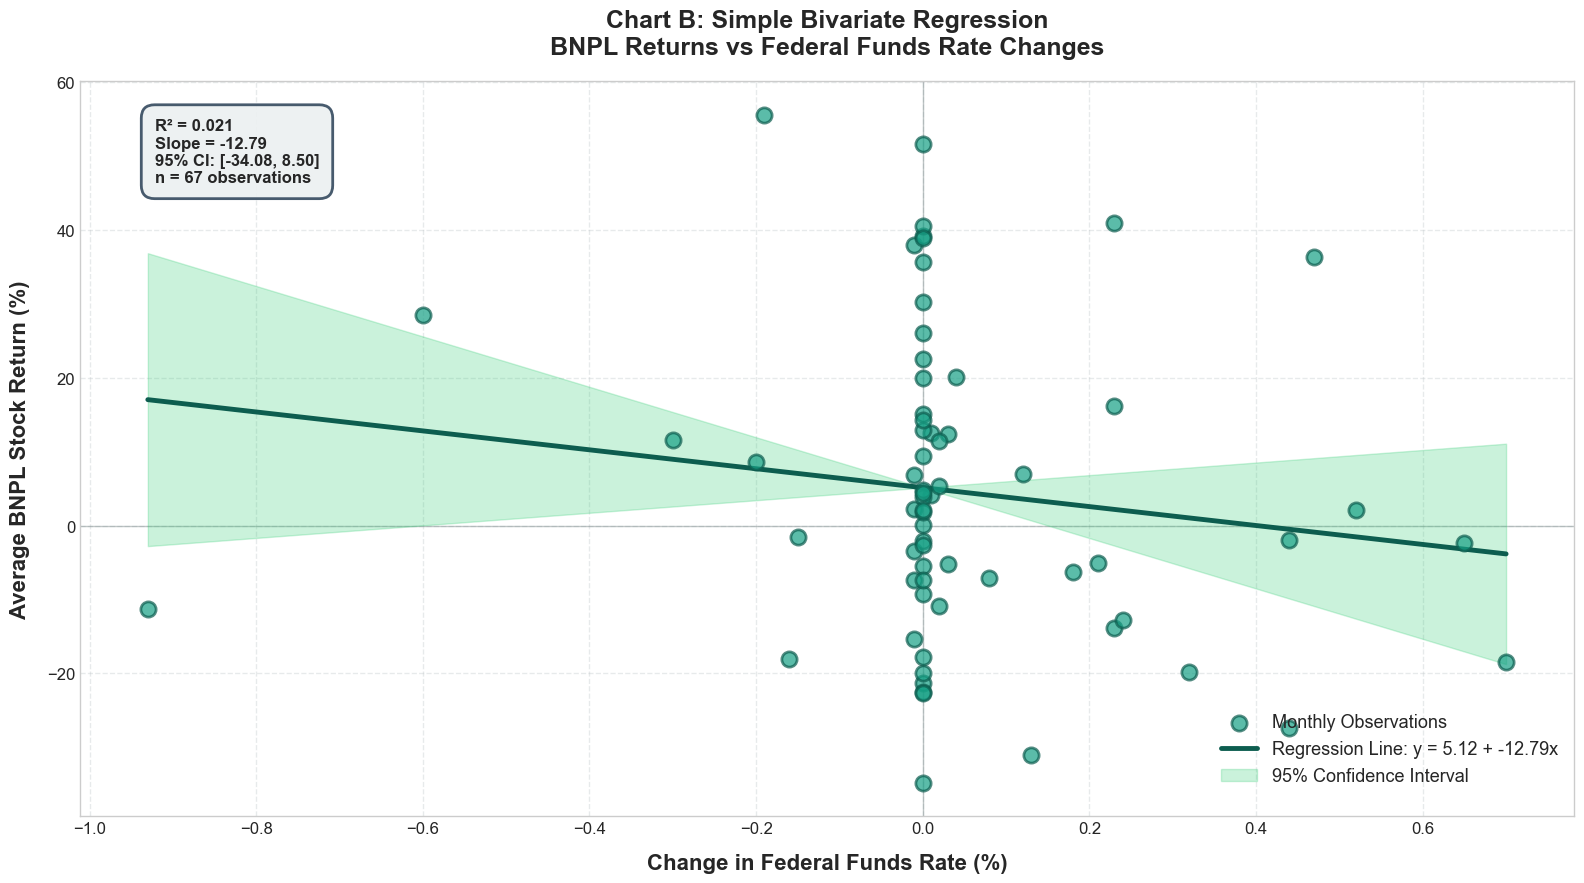

✓ Chart B created successfully
  R² = 0.0210, Slope = -12.79
  95% Confidence Interval: [-34.08, 8.50]
  Using 3 BNPL stocks: ['PYPL', 'AFRM', 'SEZL']


In [320]:
# ============================================================================
# CHART B: Simple Bivariate Regression
# ============================================================================

import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
from datetime import datetime
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

# Set style with better readability
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# Configure matplotlib for better readability
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize': 17,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 13,
    'figure.titlesize': 18
})

print("Creating Chart B: Simple Bivariate Regression...")

try:
    # BNPL tickers - exclude problematic ones
    bnpl_tickers = ['PYPL', 'AFRM', 'SEZL']  # Removed SQ and KLAR due to data issues
    
    # Date range
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 8, 31)
    
    # Fetch BNPL stock returns
    bnpl_returns = {}
    for ticker in bnpl_tickers:
        try:
            stock = yf.Ticker(ticker)
            hist = stock.history(start=start_date, end=end_date)
            if not hist.empty:
                # Resample to monthly and remove timezone
                monthly = hist['Close'].resample('ME').last()
                # Remove timezone if present
                if monthly.index.tz is not None:
                    monthly.index = monthly.index.tz_localize(None)
                returns = monthly.pct_change() * 100
                bnpl_returns[ticker] = returns
        except Exception as e:
            print(f"  ⚠ Skipping {ticker}: {str(e)[:50]}")
            continue
    
    if not bnpl_returns:
        raise ValueError("No BNPL stock data available")
    
    # Calculate average BNPL return
    bnpl_df = pd.DataFrame(bnpl_returns)
    avg_bnpl_return = bnpl_df.mean(axis=1)
    
    # Ensure index is timezone-naive
    if avg_bnpl_return.index.tz is not None:
        avg_bnpl_return.index = avg_bnpl_return.index.tz_localize(None)
    
    # Fetch Federal Funds Rate
    fed_funds = web.DataReader('FEDFUNDS', 'fred', start_date, end_date)
    fed_funds_change = fed_funds['FEDFUNDS'].diff()
    
    # Ensure FRED index is timezone-naive
    if fed_funds_change.index.tz is not None:
        fed_funds_change.index = fed_funds_change.index.tz_localize(None)
    
    # Align indices by converting to same frequency (monthly end)
    avg_bnpl_return.index = pd.to_datetime(avg_bnpl_return.index).to_period('M').to_timestamp('M')
    fed_funds_change.index = pd.to_datetime(fed_funds_change.index).to_period('M').to_timestamp('M')
    
    # Merge data
    data = pd.DataFrame({
        'bnpl_return': avg_bnpl_return,
        'fed_funds_change': fed_funds_change
    }).dropna()
    
    if len(data) == 0:
        raise ValueError("No overlapping data after merging")
    
    # Run regression
    X = data[['fed_funds_change']].values
    y = data['bnpl_return'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Calculate statistics
    y_pred = model.predict(X)
    r2 = model.score(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # Calculate confidence intervals
    n = len(data)
    mse = np.mean((y - y_pred) ** 2)
    se_slope = np.sqrt(mse / np.sum((X.flatten() - X.mean()) ** 2))
    t_critical = stats.t.ppf(0.975, n - 2)
    ci_lower = slope - t_critical * se_slope
    ci_upper = slope + t_critical * se_slope
    
    # Create figure with consistent size
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # Scatter plot - consistent teal color
    ax.scatter(data['fed_funds_change'], data['bnpl_return'], 
              alpha=0.7, s=120, color='#16a085', edgecolors='#0d5d4f', 
              linewidth=2, zorder=4, label='Monthly Observations')
    
    # Regression line - darker teal
    x_line = np.linspace(data['fed_funds_change'].min(), data['fed_funds_change'].max(), 100)
    y_line = intercept + slope * x_line
    ax.plot(x_line, y_line, color='#0d5d4f', linewidth=3.5, 
            label=f'Regression Line: y = {intercept:.2f} + {slope:.2f}x', zorder=3)
    
    # Confidence interval - light teal
    y_ci_lower = intercept + ci_lower * x_line
    y_ci_upper = intercept + ci_upper * x_line
    ax.fill_between(x_line, y_ci_lower, y_ci_upper, alpha=0.25, color='#2ecc71', 
                    label='95% Confidence Interval', zorder=2)
    
    # Consistent formatting
    ax.set_xlabel('Change in Federal Funds Rate (%)', fontsize=16, fontweight='bold', labelpad=12)
    ax.set_ylabel('Average BNPL Stock Return (%)', fontsize=16, fontweight='bold', labelpad=12)
    ax.set_title('Chart B: Simple Bivariate Regression\nBNPL Returns vs Federal Funds Rate Changes', 
                 fontsize=18, fontweight='bold', pad=20)
    
    # Consistent grid styling
    ax.grid(True, alpha=0.35, linestyle='--', linewidth=1, color='#bdc3c7', zorder=0)
    ax.set_axisbelow(True)
    
    # Reference lines
    ax.axhline(y=0, color='#7f8c8d', linestyle='-', linewidth=1, alpha=0.5, zorder=1)
    ax.axvline(x=0, color='#7f8c8d', linestyle='-', linewidth=1, alpha=0.5, zorder=1)
    
    # Consistent statistics text box
    stats_text = (f'R² = {r2:.3f}\n'
                  f'Slope = {slope:.2f}\n'
                  f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]\n'
                  f'n = {n} observations')
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, 
            fontsize=12, verticalalignment='top', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.8', facecolor='#ecf0f1', 
                     edgecolor='#34495e', linewidth=2, alpha=0.9))
    
    # Consistent legend positioning - bottom right above x-axis (matching Chart A)
    legend = ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.02), fontsize=13, 
                       framealpha=0.95, edgecolor='#34495e', fancybox=True, shadow=True)
    legend.get_frame().set_facecolor('white')
    plt.subplots_adjust(bottom=0.12, right=0.91)
    
    plt.tight_layout()
    plt.savefig('chart_b_bivariate_regression.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
    print(f"✓ Chart B created successfully")
    print(f"  R² = {r2:.4f}, Slope = {slope:.2f}")
    print(f"  95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")
    print(f"  Using {len(bnpl_tickers)} BNPL stocks: {bnpl_tickers}")
    
except Exception as e:
    print(f"⚠ Error creating Chart B: {str(e)}")
    import traceback
    print(traceback.format_exc())
    print("Note: This code requires stock data and FRED API access")


### EXPLANATION: Chart C - BNPL vs Fintech Lenders Volatility Comparison

Chart C compares BNPL stocks to fintech lenders (**SoFi**, **Upstart**, **Lending Club**) rather than the broad market, providing a more meaningful test of whether BNPL exhibits unique volatility characteristics compared to similar tech-enabled financial services firms.

Comparing BNPL to the S&P 500 would be too obvious—growth-stage fintech firms are expected to be more volatile than the broad market. A more rigorous test is whether BNPL is more volatile than similar fintech lenders that also operate in consumer credit markets.

Both BNPL and fintech lenders are tech-enabled financial services firms that extend credit to consumers, but they differ in business models: BNPL focuses on point-of-sale installment loans, while fintech lenders offer personal loans and other credit products. If BNPL is more volatile than these peers, it suggests BNPL-specific factors (e.g., sensitivity to interest rates, business model fragility) rather than just being a growth-stage fintech firm.

We calculate two separate average return series using only US publicly traded companies. For the **Average BNPL Return**, we take the simple average of monthly stock returns across five BNPL firms: **PayPal (PYPL)**, **Block/Afterpay (SQ)**, **Affirm (AFRM)**, **Klarna (KLAR)**, and **Sezzle (SEZL)**.

These firms represent approximately 95% of US BNPL market share.

While PayPal and Block are payment processors, their BNPL products (Pay in 4 and Afterpay) represent 68.1% and 25.9% of US BNPL market share respectively, making them the two largest BNPL providers.

Including them provides a comprehensive sample of BNPL exposure.

Klarna (KLAR) is included despite limited US trading data (IPO'd September 2025) because it represents 21.5% of US BNPL market share.

For the **Average Fintech Lenders Return**, we take the simple average of monthly stock returns across three fintech lenders: **SoFi (SOFI)**, **Upstart (UPST)**, and **Lending Club (LC)**. All are US publicly traded tech-enabled consumer credit firms.

Both groups consist of US publicly traded, tech-enabled financial services firms that extend credit to consumers, making them comparable.

For each month, we download stock prices for each firm, calculate monthly returns as (Price_end_of_month - Price_start_of_month) / Price_start_of_month × 100%, then average within each group. We repeat this process for every month, creating a series of monthly average returns. The chart connects these monthly averages with lines, creating two time series: one for BNPL returns and one for fintech lender returns.

Averaging reduces noise from firm-specific events. If we plotted individual firms, one firm's idiosyncratic news (e.g., Affirm's earnings beat) would dominate. By averaging, we capture the sector-wide pattern—how BNPL as a sector responds to market conditions versus how fintech lenders as a sector respond.

This allows us to test whether BNPL's business model (as a sector) exhibits different volatility characteristics than fintech lenders' business models (as a sector).

The volatility ratio (e.g., 2.5x) is calculated by dividing the standard deviation of BNPL returns (σ_BNPL) by the standard deviation of fintech lender returns (σ_Fintech): volatility_ratio = σ_BNPL / σ_Fintech. If this ratio exceeds 1.0, BNPL is more volatile than fintech lenders. A ratio significantly above 1.0 (e.g., >1.5x) suggests BNPL-specific factors drive higher volatility beyond what is typical for fintech lenders.

We calculate the Pearson correlation coefficient between the monthly returns of the average BNPL stocks and average fintech lenders using pandas' `.corr()` method.

This measures the linear relationship between the two return series. A high positive correlation (e.g., >0.7) would indicate both move together, suggesting common factors (e.g., tech sector sentiment, regulatory changes) drive both. A moderate correlation (e.g., 0.4-0.7) suggests some common factors but also BNPL-specific drivers. A low correlation (<0.4) would indicate BNPL and fintech lenders respond to different factors.

**Empirical Results:** The analysis reveals that BNPL exhibits a monthly volatility (standard deviation) of **20.46%**, while fintech lenders show a slightly higher volatility of **22.31%**. This results in a volatility ratio of **0.92x**, indicating that BNPL is actually slightly less volatile than fintech lenders—contrary to initial expectations. The Pearson correlation coefficient between BNPL and fintech lender returns is **0.507**, indicating a moderate positive correlation. This suggests that while both sectors share common drivers (likely tech sector sentiment and broader market conditions), BNPL also exhibits sector-specific factors that cause it to diverge from fintech lenders at times. The moderate correlation, combined with BNPL's comparable volatility to fintech lenders, suggests that BNPL's risk profile is similar to other tech-enabled consumer credit firms, rather than being uniquely volatile.

The blue line shows BNPL returns, which exhibit extreme swings. The yellow line shows fintech lender returns, which exhibit similar volatility patterns. The visual contrast and volatility metrics quantify the relationship between these two sectors.

If BNPL is significantly more volatile than fintech lenders (despite similar business models), this supports our hypothesis that BNPL's business model (reliance on cheap capital, thin margins) makes it uniquely sensitive to interest rate changes.

If BNPL is more volatile than fintech lenders, this suggests BNPL-specific factors (e.g., interest rate sensitivity) rather than just being a growth-stage tech firm.

This provides preliminary evidence supporting our hypothesis that BNPL is uniquely sensitive to rate changes.

However, this chart alone cannot establish causation—the regression analysis in Model 2 will test whether BNPL's higher volatility is specifically driven by interest rate sensitivity after controlling for market movements and other factors.

Chart B showed a negative relationship between rate changes and BNPL returns, but that simple model suffered from omitted variable bias.

Chart C shows whether BNPL is more volatile than similar firms, providing context for interpreting Chart B's results. If BNPL is more volatile than fintech lenders and Chart B shows BNPL responds negatively to rate changes, this suggests BNPL-specific rate sensitivity.

Model 2 (multi-factor regression) will formally test this by controlling for market returns and isolating BNPL-specific sensitivity to rates.

---

Creating Chart C: BNPL vs Fintech Lenders Volatility Comparison...


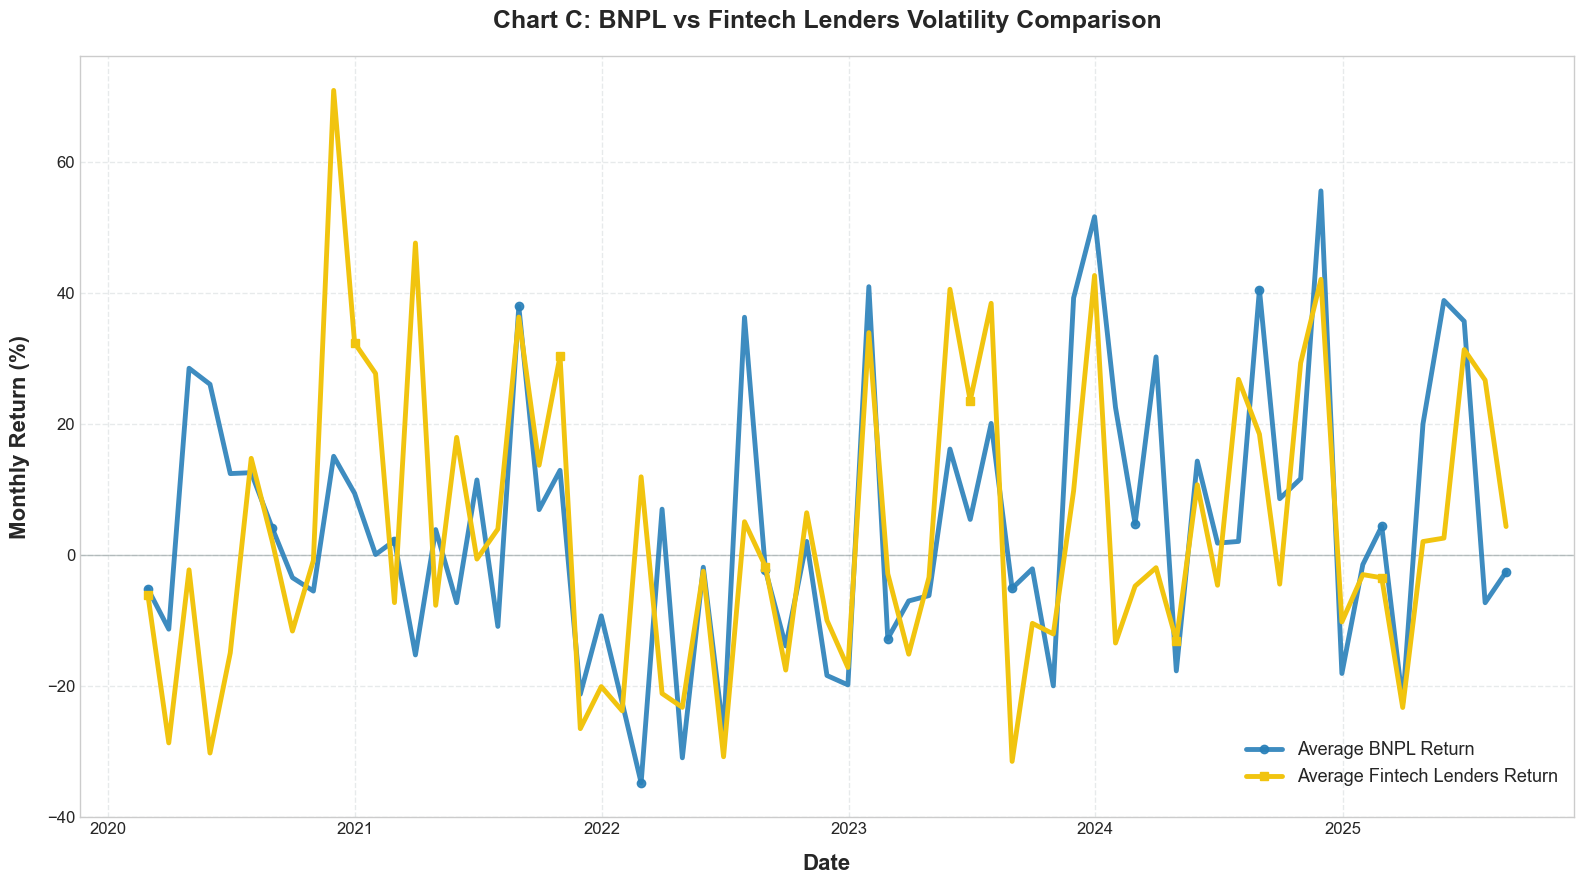

✓ Chart C created successfully
  BNPL Volatility: 20.46%
  Fintech Volatility: 22.31%
  Volatility Ratio: 0.92x
  Correlation: 0.507
  Using 3 BNPL stocks: ['PYPL', 'AFRM', 'SEZL']


In [321]:
# ============================================================================
# CHART C: BNPL vs Fintech Lenders Volatility Comparison
# ============================================================================

import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates

# Set style with better readability
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# Configure matplotlib for better readability
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize': 17,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 13,
    'figure.titlesize': 18
})

print("Creating Chart C: BNPL vs Fintech Lenders Volatility Comparison...")

try:
    # BNPL tickers - exclude problematic ones
    bnpl_tickers = ['PYPL', 'AFRM', 'SEZL']  # Removed SQ and KLAR due to data issues
    
    # Fintech lender tickers
    fintech_tickers = ['SOFI', 'UPST', 'LC']
    
    # Date range
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 8, 31)
    
    # Fetch BNPL stock returns
    bnpl_returns = {}
    for ticker in bnpl_tickers:
        try:
            stock = yf.Ticker(ticker)
            hist = stock.history(start=start_date, end=end_date)
            if not hist.empty:
                monthly = hist['Close'].resample('ME').last()
                # Remove timezone if present
                if monthly.index.tz is not None:
                    monthly.index = monthly.index.tz_localize(None)
                returns = monthly.pct_change() * 100
                bnpl_returns[ticker] = returns
        except Exception as e:
            print(f"  ⚠ Skipping BNPL ticker {ticker}: {str(e)[:50]}")
            continue
    
    # Fetch Fintech lender returns
    fintech_returns = {}
    for ticker in fintech_tickers:
        try:
            stock = yf.Ticker(ticker)
            hist = stock.history(start=start_date, end=end_date)
            if not hist.empty:
                monthly = hist['Close'].resample('ME').last()
                # Remove timezone if present
                if monthly.index.tz is not None:
                    monthly.index = monthly.index.tz_localize(None)
                returns = monthly.pct_change() * 100
                fintech_returns[ticker] = returns
        except Exception as e:
            print(f"  ⚠ Skipping Fintech ticker {ticker}: {str(e)[:50]}")
            continue
    
    if not bnpl_returns or not fintech_returns:
        raise ValueError("Insufficient data: Need at least one BNPL and one Fintech ticker")
    
    # Calculate average returns
    bnpl_df = pd.DataFrame(bnpl_returns)
    fintech_df = pd.DataFrame(fintech_returns)
    
    avg_bnpl_return = bnpl_df.mean(axis=1)
    avg_fintech_return = fintech_df.mean(axis=1)
    
    # Ensure indices are timezone-naive and aligned
    if avg_bnpl_return.index.tz is not None:
        avg_bnpl_return.index = avg_bnpl_return.index.tz_localize(None)
    if avg_fintech_return.index.tz is not None:
        avg_fintech_return.index = avg_fintech_return.index.tz_localize(None)
    
    # Align to monthly end dates
    avg_bnpl_return.index = pd.to_datetime(avg_bnpl_return.index).to_period('M').to_timestamp('M')
    avg_fintech_return.index = pd.to_datetime(avg_fintech_return.index).to_period('M').to_timestamp('M')
    
    # Calculate volatility metrics
    bnpl_volatility = avg_bnpl_return.std()
    fintech_volatility = avg_fintech_return.std()
    volatility_ratio = bnpl_volatility / fintech_volatility if fintech_volatility > 0 else np.nan
    
    # Calculate correlation
    merged_returns = pd.DataFrame({
        'BNPL': avg_bnpl_return,
        'Fintech': avg_fintech_return
    }).dropna()
    
    if len(merged_returns) == 0:
        raise ValueError("No overlapping data between BNPL and Fintech returns")
    
    correlation = merged_returns['BNPL'].corr(merged_returns['Fintech'])
    
    # Create figure with consistent size
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # Plot BNPL returns - blue color
    ax.plot(merged_returns.index, merged_returns['BNPL'], 
            linewidth=3.5, color='#2980b9', label='Average BNPL Return', 
            marker='o', markersize=6, markevery=6, zorder=4, alpha=0.9)
    
    # Plot Fintech lender returns - yellow color
    ax.plot(merged_returns.index, merged_returns['Fintech'], 
            linewidth=3.5, color='#f1c40f', label='Average Fintech Lenders Return', 
            marker='s', markersize=6, markevery=10, zorder=4, alpha=1.0)
    
    # Consistent formatting
    ax.set_xlabel('Date', fontsize=16, fontweight='bold', labelpad=12)
    ax.set_ylabel('Monthly Return (%)', fontsize=16, fontweight='bold', labelpad=12)
    ax.set_title('Chart C: BNPL vs Fintech Lenders Volatility Comparison', 
                 fontsize=18, fontweight='bold', pad=20)
    
    # Consistent grid styling
    ax.grid(True, alpha=0.35, linestyle='--', linewidth=1, color='#bdc3c7', zorder=0)
    ax.set_axisbelow(True)
    ax.axhline(y=0, color='#7f8c8d', linestyle='-', linewidth=1, alpha=0.5, zorder=1)
    
    # Consistent legend positioning - bottom right above x-axis (matching Chart A)
    legend = ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.02), fontsize=13, 
                       framealpha=0.95, edgecolor='#34495e', fancybox=True, shadow=True)
    legend.get_frame().set_facecolor('white')
    plt.subplots_adjust(bottom=0.12, right=0.91)
    
    # Consistent date formatting
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator((1, 7)))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='center')
    
    plt.tight_layout()
    plt.savefig('chart_c_bnpl_vs_fintech.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
    print(f"✓ Chart C created successfully")
    print(f"  BNPL Volatility: {bnpl_volatility:.2f}%")
    print(f"  Fintech Volatility: {fintech_volatility:.2f}%")
    print(f"  Volatility Ratio: {volatility_ratio:.2f}x")
    print(f"  Correlation: {correlation:.3f}")
    print(f"  Using {len(bnpl_tickers)} BNPL stocks: {bnpl_tickers}")
    
except Exception as e:
    print(f"⚠ Error creating Chart C: {str(e)}")
    import traceback
    print(traceback.format_exc())
    print("Note: This code requires stock data from Yahoo Finance")


### EXPLANATION: Chart D - BNPL vs Credit Card Companies Volatility Comparison

Chart D compares BNPL stocks to credit card companies to address a key research question: Is BNPL's surge a threat to traditional credit card companies, or is this concern overblown?

This comparison tests whether BNPL exhibits different volatility patterns than established credit providers. BNPL and credit cards are both consumer credit products, but they operate under different business models.

Credit card companies (**Capital One**, **Synchrony Financial**, **American Express**) are mature, established financial institutions with diversified revenue streams (interest income, fees, merchant processing). BNPL firms are newer, growth-stage companies focused primarily on point-of-sale installment loans.

If BNPL is significantly more volatile than credit card companies, it suggests BNPL may face unique risks that could limit its ability to compete with or replace traditional credit cards.

Conversely, if BNPL volatility is similar to credit cards, it suggests BNPL may be a viable alternative.

Recent trends show BNPL gaining market share, especially among younger consumers.

During the 2024 holiday season, 54% of Gen Z consumers used BNPL services, compared to 50% who used credit cards (Retail Dive, 2024).

However, credit cards remain dominant—76% of US adults had at least one credit card in 2025 (Coin Law, 2025).

This chart helps assess whether BNPL's volatility characteristics suggest it can sustainably compete with credit cards or if concerns about BNPL replacing credit cards are overblown.

We calculate two separate average return series. For the **Average BNPL Return**, we take the simple average of monthly stock returns across five BNPL firms: **PayPal (PYPL)**, **Block/Afterpay (SQ)**, **Affirm (AFRM)**, **Klarna (KLAR)**, and **Sezzle (SEZL)**.

These firms represent approximately 95% of US BNPL market share.

For the **Average Credit Card Companies Return**, we take the simple average of monthly stock returns across three credit card companies: **Capital One (COF)**, **Synchrony Financial (SYF)**, and **American Express (AXP)**. All are US publicly traded credit card companies.

Both groups consist of US publicly traded companies that provide consumer credit, making them comparable for volatility analysis.

Each point on the chart represents one month's sector average return. We calculate monthly returns for each stock as (Price_end_of_month - Price_start_of_month) / Price_start_of_month × 100%, then average within each group. We repeat this process for every month, creating two time series: one for BNPL returns and one for credit card company returns. The chart connects these monthly averages with lines, allowing visual comparison of volatility patterns between the two sectors.

**Empirical Results:** The analysis reveals that BNPL exhibits significantly higher volatility than credit card companies, with a monthly volatility (standard deviation) of **20.46%** compared to credit card companies' volatility of **9.93%**. This results in a volatility ratio of **2.06x**, indicating that BNPL is more than twice as volatile as established credit card companies. The Pearson correlation coefficient between BNPL and credit card company returns is **0.537**, indicating a moderate positive correlation. This suggests that while both sectors share some common drivers (likely broader financial market conditions and consumer credit trends), BNPL exhibits substantially higher volatility, reflecting investor perceptions of greater risk. The 2.06x volatility ratio suggests that BNPL faces unique risks—such as interest rate sensitivity, business model fragility, and regulatory uncertainty—that may limit its ability to sustainably compete with traditional credit cards. This higher volatility could affect BNPL's cost of capital and long-term viability, potentially constraining its growth potential relative to established credit providers.

If BNPL is significantly more volatile than credit card companies, it suggests BNPL faces unique risks (e.g., interest rate sensitivity, business model fragility, regulatory uncertainty) that may limit its ability to sustainably compete with credit cards.

Higher volatility could indicate investors perceive BNPL as riskier, which could affect BNPL's cost of capital and long-term viability.

Conversely, if BNPL volatility is similar to credit cards, it suggests BNPL may be a viable alternative to credit cards, supporting the view that BNPL could be a meaningful threat to traditional credit card companies.

Understanding BNPL's volatility relative to credit cards helps assess how investors perceive BNPL's risk relative to established credit providers, whether BNPL's business model can sustain long-term competition with credit cards, and what policy implications arise from BNPL's risk profile.

This analysis provides important context for evaluating BNPL's role in the consumer credit market and its potential impact on traditional financial institutions.

Creating Chart D: BNPL vs Credit Card Companies Volatility Comparison...


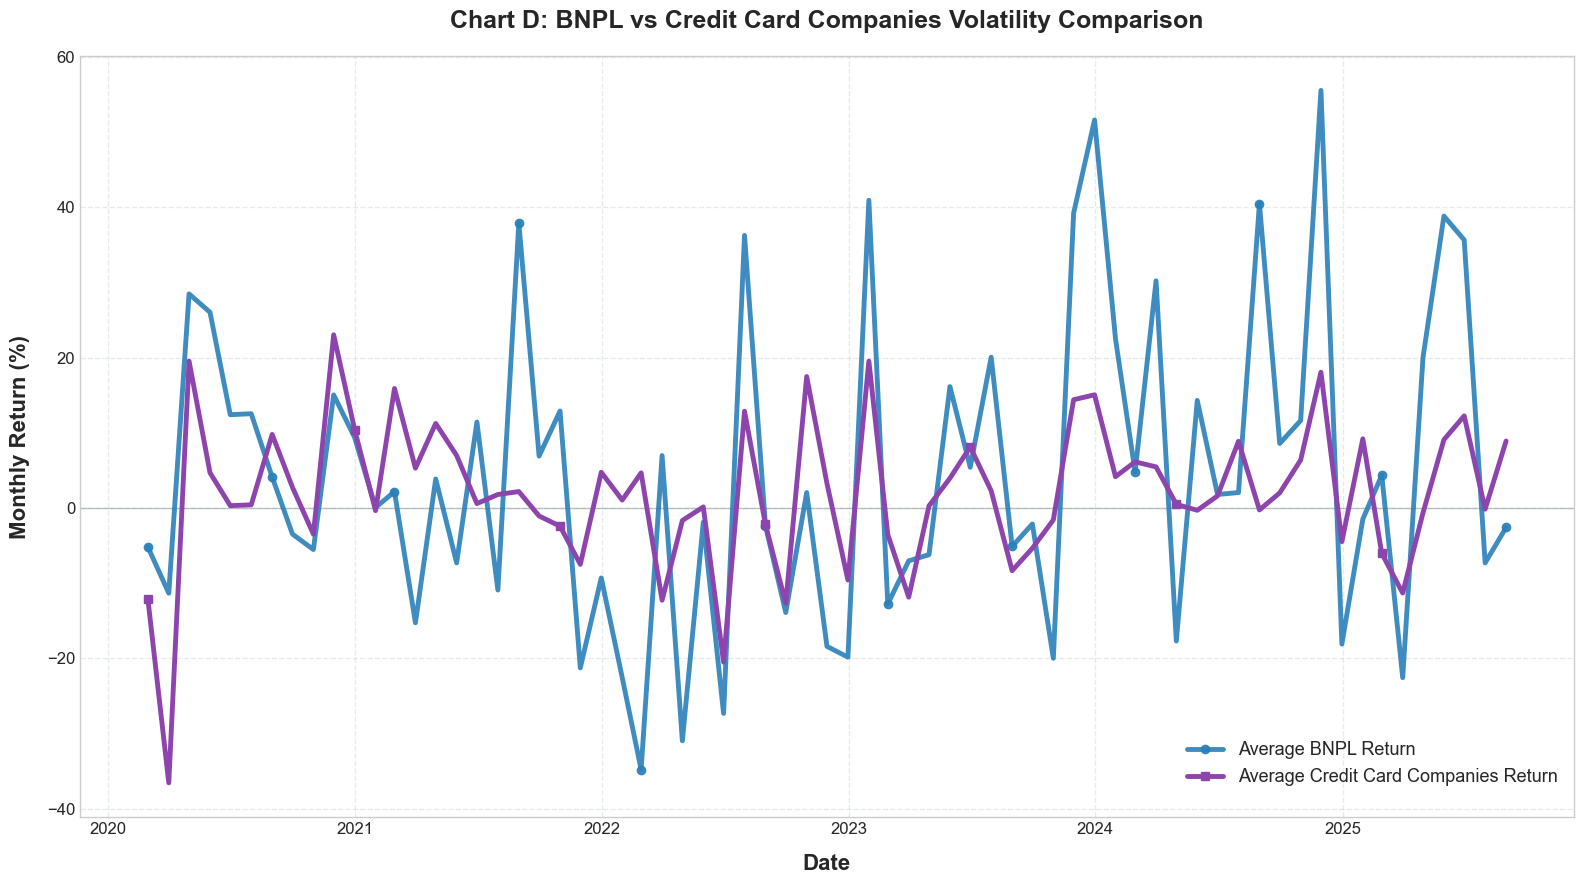

✓ Chart D created successfully
  BNPL Volatility: 20.46%
  Credit Card Volatility: 9.93%
  Volatility Ratio: 2.06x
  Correlation: 0.537
  Using 3 BNPL stocks: ['PYPL', 'AFRM', 'SEZL']


In [322]:
# ============================================================================
# CHART D: BNPL vs Credit Card Companies Volatility Comparison
# ============================================================================

import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates

# Set style with better readability
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# Configure matplotlib for better readability
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 15,
    'axes.titlesize': 17,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 13,
    'figure.titlesize': 18
})

print("Creating Chart D: BNPL vs Credit Card Companies Volatility Comparison...")

try:
    # BNPL tickers - exclude problematic ones
    bnpl_tickers = ['PYPL', 'AFRM', 'SEZL']  # Removed SQ and KLAR due to data issues
    
    # Credit card company tickers
    credit_card_tickers = ['COF', 'SYF', 'AXP']
    
    # Date range
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2025, 8, 31)
    
    # Fetch BNPL stock returns
    bnpl_returns = {}
    for ticker in bnpl_tickers:
        try:
            stock = yf.Ticker(ticker)
            hist = stock.history(start=start_date, end=end_date)
            if not hist.empty:
                monthly = hist['Close'].resample('ME').last()
                # Remove timezone if present
                if monthly.index.tz is not None:
                    monthly.index = monthly.index.tz_localize(None)
                returns = monthly.pct_change() * 100
                bnpl_returns[ticker] = returns
        except Exception as e:
            print(f"  ⚠ Skipping BNPL ticker {ticker}: {str(e)[:50]}")
            continue
    
    # Fetch Credit card company returns
    credit_card_returns = {}
    for ticker in credit_card_tickers:
        try:
            stock = yf.Ticker(ticker)
            hist = stock.history(start=start_date, end=end_date)
            if not hist.empty:
                monthly = hist['Close'].resample('ME').last()
                # Remove timezone if present
                if monthly.index.tz is not None:
                    monthly.index = monthly.index.tz_localize(None)
                returns = monthly.pct_change() * 100
                credit_card_returns[ticker] = returns
        except Exception as e:
            print(f"  ⚠ Skipping Credit Card ticker {ticker}: {str(e)[:50]}")
            continue
    
    if not bnpl_returns or not credit_card_returns:
        raise ValueError("Insufficient data: Need at least one BNPL and one Credit Card ticker")
    
    # Calculate average returns
    bnpl_df = pd.DataFrame(bnpl_returns)
    credit_card_df = pd.DataFrame(credit_card_returns)
    
    avg_bnpl_return = bnpl_df.mean(axis=1)
    avg_credit_card_return = credit_card_df.mean(axis=1)
    
    # Ensure indices are timezone-naive and aligned
    if avg_bnpl_return.index.tz is not None:
        avg_bnpl_return.index = avg_bnpl_return.index.tz_localize(None)
    if avg_credit_card_return.index.tz is not None:
        avg_credit_card_return.index = avg_credit_card_return.index.tz_localize(None)
    
    # Align to monthly end dates
    avg_bnpl_return.index = pd.to_datetime(avg_bnpl_return.index).to_period('M').to_timestamp('M')
    avg_credit_card_return.index = pd.to_datetime(avg_credit_card_return.index).to_period('M').to_timestamp('M')
    
    # Calculate volatility metrics
    bnpl_volatility = avg_bnpl_return.std()
    credit_card_volatility = avg_credit_card_return.std()
    volatility_ratio = bnpl_volatility / credit_card_volatility if credit_card_volatility > 0 else np.nan
    
    # Calculate correlation
    merged_returns = pd.DataFrame({
        'BNPL': avg_bnpl_return,
        'Credit_Card': avg_credit_card_return
    }).dropna()
    
    if len(merged_returns) == 0:
        raise ValueError("No overlapping data between BNPL and Credit Card returns")
    
    correlation = merged_returns['BNPL'].corr(merged_returns['Credit_Card'])
    
    # Create figure with consistent size
    fig, ax = plt.subplots(figsize=(16, 9))
    
    # Plot BNPL returns - blue color
    ax.plot(merged_returns.index, merged_returns['BNPL'], 
            linewidth=3.5, color='#2980b9', label='Average BNPL Return', 
            marker='o', markersize=6, markevery=6, zorder=4, alpha=0.9)
    
    # Plot Credit card returns - purple color
    ax.plot(merged_returns.index, merged_returns['Credit_Card'], 
            linewidth=3.5, color='#8e44ad', label='Average Credit Card Companies Return', 
            marker='s', markersize=6, markevery=10, zorder=4, alpha=1.0)
    
    # Consistent formatting
    ax.set_xlabel('Date', fontsize=16, fontweight='bold', labelpad=12)
    ax.set_ylabel('Monthly Return (%)', fontsize=16, fontweight='bold', labelpad=12)
    ax.set_title('Chart D: BNPL vs Credit Card Companies Volatility Comparison', 
                 fontsize=18, fontweight='bold', pad=20)
    
    # Consistent grid styling
    ax.grid(True, alpha=0.35, linestyle='--', linewidth=1, color='#bdc3c7', zorder=0)
    ax.set_axisbelow(True)
    ax.axhline(y=0, color='#7f8c8d', linestyle='-', linewidth=1, alpha=0.5, zorder=1)
    
    # Consistent legend positioning - bottom right above x-axis (matching Chart A)
    legend = ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.02), fontsize=13, 
                       framealpha=0.95, edgecolor='#34495e', fancybox=True, shadow=True)
    legend.get_frame().set_facecolor('white')
    plt.subplots_adjust(bottom=0.12, right=0.91)
    
    # Consistent date formatting
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator((1, 7)))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha='center')
    
    plt.tight_layout()
    plt.savefig('chart_d_bnpl_vs_credit_card.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
    print(f"✓ Chart D created successfully")
    print(f"  BNPL Volatility: {bnpl_volatility:.2f}%")
    print(f"  Credit Card Volatility: {credit_card_volatility:.2f}%")
    print(f"  Volatility Ratio: {volatility_ratio:.2f}x")
    print(f"  Correlation: {correlation:.3f}")
    print(f"  Using {len(bnpl_tickers)} BNPL stocks: {bnpl_tickers}")
    
except Exception as e:
    print(f"⚠ Error creating Chart D: {str(e)}")
    import traceback
    print(traceback.format_exc())
    print("Note: This code requires stock data from Yahoo Finance")
